## Install modules to environment

In [1]:
%pip install pandas numpy requests seaborn matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import modules

In [2]:
from Backtesting.dataFetchers.marketDataFetchers import CoinbaseFetcher
from Backtesting.dataFetchers.onChainMetricsFetchers import CryptoQuantFetcher
from Backtesting.dataFetchers.onChainMetricsFetchers import CryptoQuantFetcherWithoutExchange
from Backtesting.strategies.metaFusionStrategy import MetaFusionStrategy
from Backtesting.backtest import Backtest

from datetime import datetime



## Fetch Data

Input API key and desired interval and window

In [3]:
API_KEY = "GlYxSZP9hnooNl6gGAjtkptkeqehSnk5C60Akhpw5zupBK6O"
LIMIT = 1000


### Market Data

In [4]:
MARKET_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/coinbase/candle"

SYMBOL = "BTC-USD" # Can be any symbol available on Coinbase
INTERVAL = "1h" # Can be any interval such as "1d", "1h", "15m", etc.

In [ ]:
# start_time = int(datetime(2023, 1, 1).timestamp() * 1000)
# end_time = int(datetime(2024, 12, 31, 23, 59).timestamp() * 1000)

bt_start_time = int(datetime(2021, 1, 1).timestamp() * 1000)
bt_end_time = int(datetime(2023, 12, 31, 23, 59).timestamp() * 1000)

ft_start_time = int(datetime(2023, 1, 1).timestamp() * 1000)
ft_end_time = int(datetime(2024, 1, 1, 23, 59).timestamp() * 1000)

# bt_start_time = int(datetime(2023, 1, 1).timestamp() * 1000)
# bt_end_time = int(datetime(2023, 2, 1, 23, 59).timestamp() * 1000)

# ft_start_time = int(datetime(2024, 1, 1).timestamp() * 1000)
# ft_end_time = int(datetime(2024, 2, 1, 23, 59).timestamp() * 1000)


In [6]:
market_data_fetcher = CoinbaseFetcher(API_KEY, MARKET_DATA_BASE_URL, SYMBOL, LIMIT)

### On Chain Metrics Data 

In [7]:
ONCHAIN_API_KEY = "GlYxSZP9hnooNl6gGAjtkptkeqehSnk5C60Akhpw5zupBK6O"
ONCHAIN_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/cryptoquant"
GLASSNODE_BASE_URL = "https://api.datasource.cybotrade.rs/glassnode"
EXCHANGE = "binance" # Can be any exchange available on CryptoQuant
CURRENCY = "btc" # Can be any symbol available on CryptoQuant
ASSET = "BTC"
ON_CHAIN_LIMIT = None # Number of data points to fetch

netflow_window = "hour"
netflow_endpoint_category = "exchange-flows"
netflow_metric = "netflow"

exchange_whale_ratio_window = "hour"
exchange_whale_ratio_endpoint_category = "flow-indicator"
exchange_whale_ratio_metric = "exchange-whale-ratio"

funding_rates_window = "hour"
funding_rates_endpoint_category = "market-data"
funding_rates_metric = "funding-rates"

dormancy_window = "day"
dormancy_endpoint_category = "network-indicator"
dormancy_metric = "dormancy"



In [8]:
def fetch_on_chain_datas(start_time, end_time, file_name):
    market_data_fetcher.fetch(start_time, end_time, INTERVAL)

    on_chain_fetcher_netflow = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, netflow_endpoint_category, netflow_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetcher_netflow.fetch_netflow(netflow_window, start_time, end_time)

    on_chain_fetecher_exchange_whale_ratio = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, exchange_whale_ratio_endpoint_category, exchange_whale_ratio_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetecher_exchange_whale_ratio.fetch_exchange_whale_ratio(exchange_whale_ratio_window, start_time, end_time)

    on_chain_fetcher_funding_rates = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, funding_rates_endpoint_category, funding_rates_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetcher_funding_rates.fetch_funding_rates(funding_rates_window, start_time, end_time)

    on_chain_fetcher_without_exchange_dormancy = CryptoQuantFetcherWithoutExchange(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, dormancy_endpoint_category, dormancy_metric, ON_CHAIN_LIMIT)
    on_chain_fetcher_without_exchange_dormancy.fetch_dormancy(dormancy_window, start_time, end_time)


    print("📁 Netflow path:", on_chain_fetcher_netflow.saved_filepath)
    print("📁 Whale Ratio path:", on_chain_fetecher_exchange_whale_ratio.saved_filepath)
    print("📁 Funding Rates path:", on_chain_fetcher_funding_rates.saved_filepath)
    print("📁 Dormancy path:", on_chain_fetcher_without_exchange_dormancy.saved_filepath)

    csvs_to_merge = [
    market_data_fetcher.saved_filepath,
    on_chain_fetcher_netflow.saved_filepath,
    on_chain_fetecher_exchange_whale_ratio.saved_filepath,
    on_chain_fetcher_funding_rates.saved_filepath,
    on_chain_fetcher_without_exchange_dormancy.saved_filepath
    ]

    CryptoQuantFetcher.merge_selected_csv_files(csvs_to_merge, file_name) 




### Fetch hmm model data

In [9]:
backtest_dataset_file_path = "datasets/backtest_data.csv"
forwardtest_dataset_file_path = "datasets/forwardtest_data.csv"

fetch_on_chain_datas(bt_start_time, bt_end_time, backtest_dataset_file_path)
fetch_on_chain_datas(ft_start_time, ft_end_time, forwardtest_dataset_file_path)

Fetching 1h data for BTC-USD from 2022-12-31 16:00:00 to 2023-02-01 15:59:00...
✅ Retrieved 1000 candles. Total: 1000
💾 Saved to datasets/BTC-USD_1h_Training data_1676102400000_to_1675267140000.csv with 1000 rows.
                         open      high       low     close      volume
timestamp                                                              
2023-02-11 03:00:00  21654.82  21727.27  21652.09  21680.90  149.611570
2023-02-11 04:00:00  21680.23  21696.85  21666.39  21689.83  104.297894
2023-02-11 05:00:00  21689.83  21711.90  21672.21  21678.33   78.342546
2023-02-11 06:00:00  21678.34  21683.37  21658.29  21672.11   79.895550
2023-02-11 07:00:00  21672.34  21716.10  21647.11  21694.87   78.464158
Fetching exchange-flows/netflow data for btc from binance with window 'hour'...
Using range: 2022-12-31 16:00:00 to 2023-02-01 15:59:00
✅ Retrieved 768 records. Total so far: 768
Using range: 2023-02-01 15:00:01 to 2023-02-01 15:59:00
❌ Error 400: {"error":"'limit' must be between 

/Users/winnee/Study/UM Hackathon/untitled folder/Untitled/um-hackathon-budget-gang/Backtesting/dataFetchers/onChainMetricsFetchers.py:54: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample("1H").ffill()
/Users/winnee/Study/UM Hackathon/untitled folder/Untitled/um-hackathon-budget-gang/Backtesting/dataFetchers/onChainMetricsFetchers.py:69: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start=start_ts, end=end_ts, freq="1H")


✅ Retrieved 1000 candles. Total: 1000
💾 Saved to datasets/BTC-USD_1h_Training data_1707638400000_to_1706803140000.csv with 2000 rows.
                         open      high       low     close      volume
timestamp                                                              
2024-02-11 03:00:00  47795.92  48572.84  47793.75  48539.43  825.070560
2024-02-11 04:00:00  48542.39  48614.00  48288.39  48322.95  382.122489
2024-02-11 05:00:00  48324.69  48364.65  48152.55  48251.50  161.937850
2024-02-11 06:00:00  48255.91  48339.32  48152.53  48249.33  162.405441
2024-02-11 07:00:00  48250.90  48388.14  48084.96  48204.62  145.256421
Fetching exchange-flows/netflow data for btc from binance with window 'hour'...
Using range: 2023-12-31 16:00:00 to 2024-02-01 15:59:00
✅ Retrieved 768 records. Total so far: 768
Using range: 2024-02-01 15:00:01 to 2024-02-01 15:59:00
❌ Error 400: {"error":"'limit' must be between [1, 100000]"}
💾 Saved to datasets/binance_netflow_hour_Training data_17067996010

/Users/winnee/Study/UM Hackathon/untitled folder/Untitled/um-hackathon-budget-gang/Backtesting/dataFetchers/onChainMetricsFetchers.py:54: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample("1H").ffill()
/Users/winnee/Study/UM Hackathon/untitled folder/Untitled/um-hackathon-budget-gang/Backtesting/dataFetchers/onChainMetricsFetchers.py:69: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start=start_ts, end=end_ts, freq="1H")


## Instantiate Strategy

In [10]:
mfs = MetaFusionStrategy(backtest_dataset_file_path, backtest_dataset_file_path)

              timestamp      open      high       low     close       volume  \
1   2023-01-01 01:00:00  16519.84  16547.60  16517.01  16542.69   651.374868   
2   2023-01-01 02:00:00  16542.70  16550.00  16528.75  16538.60   505.074885   
3   2023-01-01 03:00:00  16538.32  16538.32  16510.09  16523.30   647.605440   
4   2023-01-01 04:00:00  16523.91  16525.75  16502.66  16511.71   754.661318   
5   2023-01-01 05:00:00  16511.69  16524.84  16503.19  16521.08   374.486721   
..                  ...       ...       ...       ...       ...          ...   
740 2023-01-31 20:00:00  23165.48  23174.69  23043.96  23094.25  1234.352940   
741 2023-01-31 21:00:00  23094.49  23123.62  22812.93  22952.23  1608.440304   
742 2023-01-31 22:00:00  22953.31  23313.23  22878.17  23180.96   831.504619   
743 2023-01-31 23:00:00  23183.83  23187.89  23082.62  23128.86  1132.428084   
744 2023-02-01 00:00:00  23127.15  23169.34  23000.00  23085.09  1106.423894   

     netflow_total  exchange_whale_rati

         1    -499.73179549             +nan
         2    4096.56321633   +4596.29501182
         3    4292.51386722    +195.95065088
         4    4335.37704353     +42.86317632
         5    4342.24724349      +6.87019996
         6    4343.56499695      +1.31775346
         7    4343.90044167      +0.33544472
         8    4343.99864757      +0.09820590
         9    4344.02979464      +0.03114707
        10    4344.04008764      +0.01029299
        11    4344.04355571      +0.00346807
/Users/winnee/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1191
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0053
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0019
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0017
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0015
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0015
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0015
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0015
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0014
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0014


In [11]:
bt = Backtest(mfs, 100000, 10, 0.006)

In [12]:
bt.run()

Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(685, 60, 5), y=(685, 3)
🕒 Predicting for 685 hours ≈ 28.5 days
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Results from LSTM model:
              timestamp  actual_close  actual_high  actual_low  \
60  2023-01-03 12:00:00      16703.34     16721.93    16697.11   
61  2023-01-03 13:00:00      16718.92     16735.24    16702.01   
62  2023-01-03 14:00:00      16655.52     16768.02    16636.43   
63  2023-01-03 15:00:00      16671.83     16677.84    16612.32   
64  2023-01-03 16:00:00      16616.59     16684.14    16606.43   
..                  ...           ...          ...         ...   
740 2023-01-31 20:00:00      23094.25     23174.69    23043.96   
741 2023-01-31 21:00:00      22952.23     23123.62    22812.93   
742 2023-01-31 22:00:00      23180.96     23313.23    22878.17   
743 2023-01-31 23:00:00      23128.86 

In [13]:
performance = bt.get_performance_results()

for key, value in performance.items():
    print(f"{key}: {value}")

Start Trade Date: 2023-01-03 13:00:00
End Trade Date: 2023-02-01 00:00:00
Final Portfolio Value: 67050.95287999991
Total Return (%): -32.94904712000009
Number of Trades: 118
Win Rate (%): 0.0
Max Drawdown (%): -0.05
Sharpe Ratio: 2.33


In [14]:
bt.get_trade_logs_csv()

Trade logs saved to backtest_trade_logs.csv


bullish range:  [0.2 0.4 0.6 0.8]
bearish range:  [0.2 0.4 0.6 0.8]
Running with bullish=0.20, bearish=0.20
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(685, 60, 5), y=(685, 3)
🕒 Predicting for 685 hours ≈ 28.5 days
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Results from LSTM model:
              timestamp  actual_close  actual_high  actual_low  \
60  2023-01-03 12:00:00      16703.34     16721.93    16697.11   
61  2023-01-03 13:00:00      16718.92     16735.24    16702.01   
62  2023-01-03 14:00:00      16655.52     16768.02    16636.43   
63  2023-01-03 15:00:00      16671.83     16677.84    16612.32   
64  2023-01-03 16:00:00      16616.59     16684.14    16606.43   
..                  ...           ...          ...         ...   
740 2023-01-31 20:00:00      23094.25     23174.69    23043.96   
741 2023-01-31 21:00:00      22952.23     23123.62    22812.93

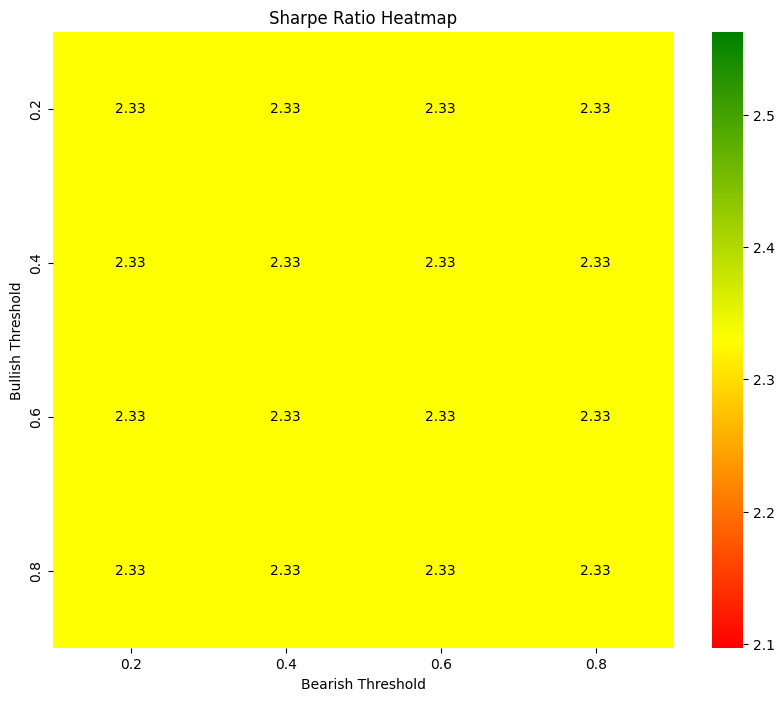

In [15]:
import numpy as np

bt.run_backtest_heatmap(bullish_range=np.linspace(0.2, 0.8, 4), bearish_range=np.linspace(0.2, 0.8, 4), metric='Sharpe Ratio', )

## Perform Forward Testing Using Best Threshold

### Set forward testing dataset

In [16]:
bt.set_predict_filepath(forwardtest_dataset_file_path, forwardtest_dataset_file_path)

### Set best threshold

In [21]:
bt.set_best_thresholds(bull_thres=0.4, bear_thres=0.4)

### Run testing using new dataset

In [22]:
bt.run()

Predict data filepath in DeepPredictorStrategy: datasets/forwardtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/forwardtest_data.csv
✅ Testing set shape: X=(683, 60, 5), y=(683, 3)
🕒 Predicting for 683 hours ≈ 28.5 days
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Results from LSTM model:
              timestamp  actual_close  actual_high  actual_low  \
60  2024-01-03 12:00:00      42815.10     43755.53    40625.68   
61  2024-01-03 13:00:00      42568.41     42847.47    42336.01   
62  2024-01-03 14:00:00      42206.31     42570.09    42068.74   
63  2024-01-03 15:00:00      43017.35     43055.18    42196.68   
64  2024-01-03 16:00:00      43025.70     43598.26    42838.11   
..                  ...           ...          ...         ...   
738 2024-01-31 20:00:00      42524.73     43351.12    42474.53   
739 2024-01-31 21:00:00      42461.38     42683.52    42265.77   
740 2024-01-31 22:00:00      42634.70     42670.75    42350.14   
741 2024-01-31 23:00:00      425

In [23]:
performance = bt.get_performance_results()

for key, value in performance.items():
    print(f"{key}: {value}")

Start Trade Date: 2024-01-03 13:00:00
End Trade Date: 2024-02-01 00:00:00
Final Portfolio Value: 100000.0
Total Return (%): 0.0
Number of Trades: 0
Win Rate (%): 0
Max Drawdown (%): 0.0
Sharpe Ratio: 0


In [24]:
bt.get_trade_logs_csv()

Trade logs saved to backtest_trade_logs.csv
